## Problem 1

In [1]:
import numpy as np
from scipy import linalg as la

def leastsq(A, b):
    Q,R = la.qr(A, mode="economic") # built in function for reduced QR decomposition
    b2 = np.dot(Q.T, b)
    x = la.solve_triangular(R, b2)
    return x

In [4]:
#Check our solution

A = np.random.random((4,4))
b = np.random.random((4,1))
leastsq(A,b)

array([[ -1.39848977],
       [-15.65589373],
       [ 34.01230009],
       [-15.40560039]])

In [5]:
np.linalg.solve(A,b)
#Note that we can only verify our solution this way for square matrices, but our function still works for other matrices.

array([[ -1.39848977],
       [-15.65589373],
       [ 34.01230009],
       [-15.40560039]])

## Problem 2

In [32]:
from matplotlib import pyplot as plt

housing = np.load("housing.npy")
housingT = housing.T
year = housingT[0]
price = housingT[1]

length = len(year)
intercepts = np.ones(length)
interceptsT = intercepts.T

yearT = year.T
A = np.vstack((yearT, interceptsT))
A=A.T

b=price

#Return the least squares coefficients
m,b = leastsq(A,b)

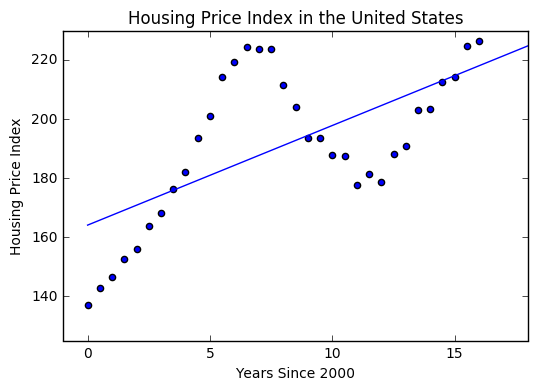

In [38]:
#Plot the output and best fit

plt.scatter(year, price)
plt.title("Housing Price Index in the United States")
plt.ylabel("Housing Price Index")
plt.xlabel("Years Since 2000")
plt.axis([-1,18,125,230])
x = np.linspace(0,20,100)
y = m*x+b
plt.plot(x,y)
plt.show()

## Problem 3

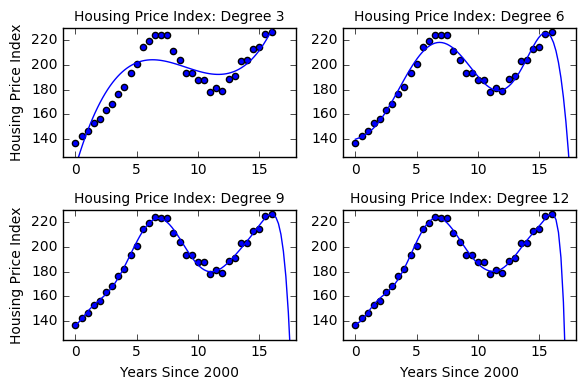

In [72]:
from scipy import linalg as la

housing = np.load("housing.npy")
housingT = housing.T
year = (housingT[0])
price = (housingT[1]).T
b = price


i = 1
while i<=4:
    A = np.vander(year, 3*i + 1)
    sol = la.lstsq(A, b)[0]
    f = np.poly1d(sol)
    x = np.linspace(0,20,100)
    y = f(x)
    
    plt.subplot(2,2,i)
    if i==1 or i==3:
        plt.ylabel("Housing Price Index")
    plt.axis([-1,18,125,230])
    if i==3 or i==4:
        plt.xlabel("Years Since 2000")
    plt.scatter(year, price)
    plt.plot(x,y)
    plt.title("Housing Price Index: Degree "+str(3*i), fontsize=10)
    i +=1 

plt.tight_layout()
plt.show()


In [74]:
#Compare the results to polyfit

i = 1
while i<=4:
    A = np.vander(year, 3*i + 1)
    sol = la.lstsq(A, b)[0]
    f = np.poly1d(sol)
    print(f)
    i+=1
    
i = 1
while i<=4:
    print(np.polyfit(year, price, 3*i))
    i+=1 

        3         2
0.1533 x - 4.131 x + 33.78 x + 116.9
            6           5          4         3          2
-0.0006368 x + 0.02573 x - 0.3396 x + 1.434 x + 0.4336 x + 3.31 x + 139.7
            9             8            7          6         5         4
-3.585e-06 x + 0.0002669 x - 0.008184 x + 0.1324 x - 1.203 x + 6.045 x
          3         2
 - 15.65 x + 18.68 x + 2.461 x + 137.2
            12             11             10            9           8
-1.655e-08 x  + 1.602e-06 x  - 6.755e-05 x  + 0.001624 x - 0.02439 x
           7         6         5         4         3         2
 + 0.2356 x - 1.446 x + 5.314 x - 10.05 x + 4.942 x + 10.03 x - 0.2513 x + 138
[   0.15333253   -4.13096835   33.78211221  116.92029369]
[ -6.36795323e-04   2.57345520e-02  -3.39577104e-01   1.43351351e+00
   4.33579551e-01   3.30968082e+00   1.39738154e+02]
[ -3.58458794e-06   2.66895490e-04  -8.18360605e-03   1.32435205e-01
  -1.20339209e+00   6.04459591e+00  -1.56548330e+01   1.86769531e+01
   2.461

The output is quite similar to those of the polyfit function but not exact.

## Problem 4: Ellipse Regression

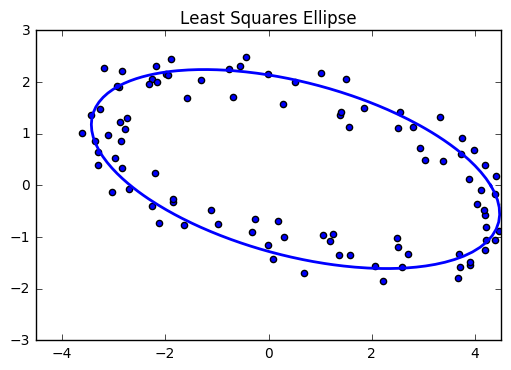

In [94]:
xk, yk = np.load('ellipse.npy').T
A = np.column_stack((xk**2, xk, xk*yk, yk, yk**2))
b = np.ones_like(xk)
a, b, c, d, e = la.lstsq(A, b)[0]

def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A))/(2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2)
    plt.gca().set_aspect("equal", "datalim")


plt.scatter(xk,yk)
plot_ellipse(a, b, c, d, e)
plt.title("Least Squares Ellipse")
plt.show()

## Problem 5: Power Method for Eigenvalues

In [155]:
def power(A, N, tol):
    """Uses the power method to compute dominant eigenvalue of an nxn matrix A
    N: maximum number of iterations
    tol: maximum distance between iterations before stopping """
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    x = np.random.rand(n)
    x = x/np.linalg.norm(x)
    k = 1
    dist = 1
    x0 = x+10 #sets the random x0 far enough away that it isn't in a tolerance
    while (k<=N-1 and dist > tol):
        dist = np.linalg.norm(x-x0)
        x0 = x
        x = np.dot(A,x0)
        x = x/np.linalg.norm(x)
        k+=1
    print("Finished in " + str(k) + " iterations")
    print("Ending distance was: " + str(dist))
    return (np.dot(x.T, np.dot(A,x)),x)

In [156]:
A = np.random.random((3, 3))
power(A,10000, 0.00001)

Finished in 16 iterations
Ending distance was: 4.2772927569e-06


(0.6885427408538024, array([ 0.46745708,  0.7383173 ,  0.48618046]))

In [157]:
la.eig(A)

(array([ 0.68854255+0.j, -0.12116365+0.j,  0.29212678+0.j]),
 array([[-0.46745672, -0.69473792,  0.09715259],
        [-0.73831816,  0.13590975, -0.85295434],
        [-0.4861795 ,  0.70630571,  0.51286476]]))

We verify that our method does indeed give the greatest eigenvalue.

## Problem 6

In [203]:
import cmath

def qr_method(A, N, tol):
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    S = la.hessenberg(A)
    k = 0
    while k <= N-1:
        Q, R = la.qr(S)
        S = np.dot(R,Q)
        k += 1
    eigs = []
    print(S)
    i = 0
    while i < n-1:
        if abs(S[i+1,i]) < tol: #1x1 matrix
            eigs.append(S[i][i])
        else:
            eig1 = 0.5*(a+d+cmath.sqrt((a+d)**2+4*b*c))
            eigs.append(eig1)
            eig2 = 0.5*(a+d+cmath.sqrt((a+d)**2+4*b*c))
            eigs.append(eig2)
            i += 1
        i += 1
    eigs.append(S[n-1][n-1])
    return eigs  

In [201]:
A = np.random.random((3, 3))
print(qr_method(A, 1000, 0.01))
print(la.eig(A))

[[ 1.13220481 -0.02035153  0.43921965]
 [ 0.          0.3902433   0.62961913]
 [ 0.          0.          0.09224149]]
[1.1322048135341165, 0.39024329624450227, 0.092241485430796216]
(array([ 1.13220481+0.j,  0.39024330+0.j,  0.09224149+0.j]), array([[-0.36546539, -0.93393163,  0.93686841],
       [-0.16373337, -0.05736008, -0.33461999],
       [-0.91631132,  0.3528194 , -0.10152367]]))


In [202]:
B = np.random.random((4,4))
sym = B + B.T
print(qr_method(sym,1000,0.01))
print(la.eig(sym))

[[  3.88268119e+000   9.30961926e-017  -7.86266039e-016  -2.15319644e-016]
 [  0.00000000e+000   1.31772517e+000   5.62998055e-017   1.84896617e-017]
 [  0.00000000e+000   4.78106015e-106  -1.03079445e+000  -1.99673312e-016]
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000  -3.80139229e-001]]
[3.8826811934096996, 1.3177251711164299, -1.0307944497070896, -0.38013922946461992]
(array([ 3.88268119+0.j, -1.03079445+0.j, -0.38013923+0.j,  1.31772517+0.j]), array([[ 0.43533129,  0.59357795,  0.66536798,  0.12424708],
       [ 0.44565097, -0.64355424,  0.37523901, -0.496416  ],
       [ 0.60090403,  0.3363801 , -0.62440721, -0.36861688],
       [ 0.50079559, -0.34691728, -0.16308514,  0.77605117]]))


Our code then matches the output for the built in function.